In [142]:
import numpy as np
import pandas as pd
from pandas import DataFrame, Series
import matplotlib.pyplot as plt

- Time Series with Pandas
- 시계열 데이터 특성
- ETS 모델
- EWMA 모델

In [3]:
from datetime import datetime

In [5]:
pycon_year = 2018
pycon_month = 8
pycon_day = 17
pycon_hour = 14
pycon_minute = 26
pycon_seconde = 20

In [7]:
pycon_date = datetime(
pycon_year,
pycon_month,
pycon_day,
pycon_hour,
pycon_minute,
pycon_seconde,)

In [8]:
pycon_date

datetime.datetime(2018, 8, 17, 14, 26, 20)

- 시, 분, 초는 생략 가능

In [9]:
print(pycon_date.year, pycon_date.day)

2018 17


In [10]:
main_dates = [datetime(2018, 8, 18), datetime(2018, 8, 19)]

In [11]:
main_dates

[datetime.datetime(2018, 8, 18, 0, 0), datetime.datetime(2018, 8, 19, 0, 0)]

In [12]:
dt_ind = pd.DatetimeIndex(main_dates)

In [13]:
dt_ind

DatetimeIndex(['2018-08-18', '2018-08-19'], dtype='datetime64[ns]', freq=None)

In [17]:
data = np.random.randn(2,2)

In [18]:
data

array([[-1.76407592,  1.99487442],
       [ 1.2685782 , -1.35416196]])

In [19]:
df = pd.DataFrame(data, dt_ind, ['A', 'B'])

In [20]:
df

,A,B
2018-08-18,-1.764076,1.994874
2018-08-19,1.268578,-1.354162


In [21]:
df.index

DatetimeIndex(['2018-08-18', '2018-08-19'], dtype='datetime64[ns]', freq=None)

In [22]:
df.index.max()

Timestamp('2018-08-19 00:00:00')

In [23]:
df.index.min()

Timestamp('2018-08-18 00:00:00')

In [24]:
df.index.argmax()

1

In [25]:
df.index.argmin()

0

## Time Resampling

In [26]:
wallmart = pd.read_csv('./data/walmart_stock.csv')

In [28]:
wallmart.head()

,Date,Open,High,Low,Close,Volume,Adj Close
0,2012-01-03,59.970001,61.060001,59.869999,60.330002,12668800,52.619235
1,2012-01-04,60.209999,60.349998,59.470001,59.709999,9593300,52.078475
2,2012-01-05,59.349998,59.619999,58.369999,59.419998,12768200,51.825539
3,2012-01-06,59.419998,59.450001,58.869999,59.000000,8069400,51.459220
4,2012-01-09,59.029999,59.549999,58.919998,59.180000,6679300,51.616215


In [29]:
wallmart.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1258 entries, 0 to 1257
Data columns (total 7 columns):
Date         1258 non-null object
Open         1258 non-null float64
High         1258 non-null float64
Low          1258 non-null float64
Close        1258 non-null float64
Volume       1258 non-null int64
Adj Close    1258 non-null float64
dtypes: float64(5), int64(1), object(1)
memory usage: 68.9+ KB


In [31]:
wallmart['Date'].apply(pd.to_datetime)
# wallmart['Date'].apply(lambda d: pd.to_datetime(d))

0      2012-01-03
1      2012-01-04
2      2012-01-05
3      2012-01-06
4      2012-01-09
5      2012-01-10
6      2012-01-11
7      2012-01-12
8      2012-01-13
9      2012-01-17
10     2012-01-18
11     2012-01-19
12     2012-01-20
13     2012-01-23
14     2012-01-24
15     2012-01-25
16     2012-01-26
17     2012-01-27
18     2012-01-30
19     2012-01-31
20     2012-02-01
21     2012-02-02
22     2012-02-03
23     2012-02-06
24     2012-02-07
25     2012-02-08
26     2012-02-09
27     2012-02-10
28     2012-02-13
29     2012-02-14
          ...    
1228   2016-11-17
1229   2016-11-18
1230   2016-11-21
1231   2016-11-22
1232   2016-11-23
1233   2016-11-25
1234   2016-11-28
1235   2016-11-29
1236   2016-11-30
1237   2016-12-01
1238   2016-12-02
1239   2016-12-05
1240   2016-12-06
1241   2016-12-07
1242   2016-12-08
1243   2016-12-09
1244   2016-12-12
1245   2016-12-13
1246   2016-12-14
1247   2016-12-15
1248   2016-12-16
1249   2016-12-19
1250   2016-12-20
1251   2016-12-21
1252   201

In [34]:
wallmart['Date'] = wallmart['Date'].apply(pd.to_datetime)
wallmart.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1258 entries, 0 to 1257
Data columns (total 7 columns):
Date         1258 non-null datetime64[ns]
Open         1258 non-null float64
High         1258 non-null float64
Low          1258 non-null float64
Close        1258 non-null float64
Volume       1258 non-null int64
Adj Close    1258 non-null float64
dtypes: datetime64[ns](1), float64(5), int64(1)
memory usage: 68.9 KB


In [36]:
wallmart = wallmart.set_index('Date')

In [37]:
wallmart.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1258 entries, 2012-01-03 to 2016-12-30
Data columns (total 6 columns):
Open         1258 non-null float64
High         1258 non-null float64
Low          1258 non-null float64
Close        1258 non-null float64
Volume       1258 non-null int64
Adj Close    1258 non-null float64
dtypes: float64(5), int64(1)
memory usage: 68.8 KB


In [38]:
wallmart.head()

,Open,High,Low,Close,Volume,Adj Close
Date,,,,,,
2012-01-03,59.970001,61.060001,59.869999,60.330002,12668800,52.619235
2012-01-04,60.209999,60.349998,59.470001,59.709999,9593300,52.078475
2012-01-05,59.349998,59.619999,58.369999,59.419998,12768200,51.825539
2012-01-06,59.419998,59.450001,58.869999,59.000000,8069400,51.459220
2012-01-09,59.029999,59.549999,58.919998,59.180000,6679300,51.616215


In [41]:
wallmart.index.month

Int64Index([ 1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
            ...
            12, 12, 12, 12, 12, 12, 12, 12, 12, 12],
           dtype='int64', name='Date', length=1258)

In [43]:
wallmart['month'] = wallmart.index.month

In [44]:
wallmart.head()

,Open,High,Low,Close,Volume,Adj Close,month
Date,,,,,,,
2012-01-03,59.970001,61.060001,59.869999,60.330002,12668800,52.619235,1
2012-01-04,60.209999,60.349998,59.470001,59.709999,9593300,52.078475,1
2012-01-05,59.349998,59.619999,58.369999,59.419998,12768200,51.825539,1
2012-01-06,59.419998,59.450001,58.869999,59.000000,8069400,51.459220,1
2012-01-09,59.029999,59.549999,58.919998,59.180000,6679300,51.616215,1


In [46]:
wallmart.groupby('month').agg(sum)

,Open,High,Low,Close,Volume,Adj Close
month,,,,,,
1,7212.220003,7268.980024,7161.329970,7216.249978,884947000,6622.456744
2,6905.550015,6957.660026,6857.279998,6916.760031,947122300,6353.198009
3,7670.879987,7725.709989,7631.109984,7680.239984,826236500,7091.568413
4,7660.509997,7712.380057,7614.709994,7662.229996,835404200,7081.601251
5,7657.810029,7708.090032,7616.410015,7664.829990,915029200,7108.951427
6,7686.069953,7730.180014,7644.929985,7684.510007,880198200,7148.457581
7,7956.259989,8001.330024,7918.530036,7965.049980,731996000,7394.593921
8,8037.930001,8086.960005,7985.419985,8033.280041,851971800,7497.262179
9,7362.319978,7405.500031,7319.810032,7362.780021,733834000,6885.571319


In [47]:
wallmart.groupby(wallmart.index.year).sum()

,Open,High,Low,Close,Volume,Adj Close,month
Date,,,,,,,
2012,16789.670034,16900.529982,16696.629982,16803.780008,2309753800,14847.337229,1625
2013,18966.540019,19083.810035,18860.449977,18980.770062,1751777000,17173.089067,1649
2014,19473.179951,19590.490081,19369.830036,19486.499984,1641934300,18070.847484,1651
2015,18287.489965,18412.170090,18152.770020,18267.760027,2278273900,17345.519416,1655
2016,17509.300053,17644.950012,17393.919992,17525.859994,2361654600,17149.665621,1652


### time series offset string

https://pandas.pydata.org/pandas-docs/stable/timeseries.html#offset-aliases

In [48]:
wallmart.resample(rule='A')

DatetimeIndexResampler [freq=<YearEnd: month=12>, axis=0, closed=right, label=right, convention=start, base=0]

In [49]:
wallmart.resample(rule='A').mean()

,Open,High,Low,Close,Volume,Adj Close,month
Date,,,,,,,
2012-12-31,67.158680,67.602120,66.786520,67.215120,9.239015e+06,59.389349,6.500000
2013-12-31,75.264048,75.729405,74.843055,75.320516,6.951496e+06,68.147179,6.543651
2014-12-31,77.274524,77.740040,76.864405,77.327381,6.515612e+06,71.709712,6.551587
2015-12-31,72.569405,73.064167,72.034802,72.491111,9.040769e+06,68.831426,6.567460
2016-12-31,69.481349,70.019643,69.023492,69.547063,9.371645e+06,68.054229,6.555556


In [50]:
def first_day(entry):
    return entry[0]

In [52]:
wallmart.resample(rule='AS').apply(first_day)

,Open,High,Low,Close,Volume,Adj Close,month
Date,,,,,,,
2012-01-01,59.970001,61.060001,59.869999,60.330002,12668800,52.619235,1
2013-01-01,68.930000,69.239998,68.449997,69.239998,10390800,61.879708,1
2014-01-01,78.720001,79.470001,78.500000,78.910004,6878000,72.254228,1
2015-01-01,86.269997,86.720001,85.550003,85.900002,4501800,80.624861,1
2016-01-01,60.500000,61.490002,60.360001,61.459999,11989200,59.289713,1


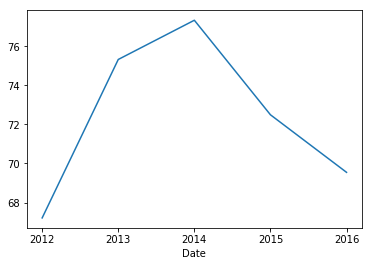

In [53]:
wallmart['Close'].resample('A').mean().plot()

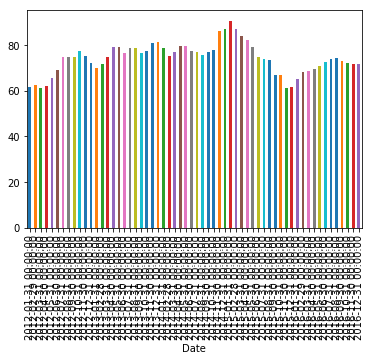

In [56]:
wallmart['Open'].resample('M').max().plot(kind='bar')

In [57]:
daily_daterange = (
    pd.date_range(
        start = datetime(2018, 8, 1), 
        end = datetime(2018, 9, 1),
        freq = 'B'))

In [58]:
daily_daterange

DatetimeIndex(['2018-08-01', '2018-08-02', '2018-08-03', '2018-08-06',
               '2018-08-07', '2018-08-08', '2018-08-09', '2018-08-10',
               '2018-08-13', '2018-08-14', '2018-08-15', '2018-08-16',
               '2018-08-17', '2018-08-20', '2018-08-21', '2018-08-22',
               '2018-08-23', '2018-08-24', '2018-08-27', '2018-08-28',
               '2018-08-29', '2018-08-30', '2018-08-31'],
              dtype='datetime64[ns]', freq='B')

In [59]:
daily_df = pd.DataFrame(
    {'value': np.random.randn(len(daily_daterange))},
    index=daily_daterange)

In [61]:
daily_df

,value
2018-08-01,0.082765
2018-08-02,-0.565372
2018-08-03,0.097735
2018-08-06,0.912266
2018-08-07,1.360720
2018-08-08,-0.441213
2018-08-09,0.770642
2018-08-10,0.274257
2018-08-13,0.713196
2018-08-14,0.561580


In [62]:
daily_df.resample('W-MON').max()

,value
2018-08-06,0.912266
2018-08-13,1.360720
2018-08-20,0.825749
2018-08-27,1.346996
2018-09-03,1.400942


In [63]:
daily_df.resample('M').min()

,value
2018-08-31,-1.45394


In [64]:
df = pd.read_csv('./data/walmart_stock.csv', index_col='Date')

In [65]:
df.index = pd.to_datetime(df.index)

In [66]:
df.index

DatetimeIndex(['2012-01-03', '2012-01-04', '2012-01-05', '2012-01-06',
               '2012-01-09', '2012-01-10', '2012-01-11', '2012-01-12',
               '2012-01-13', '2012-01-17',
               ...
               '2016-12-16', '2016-12-19', '2016-12-20', '2016-12-21',
               '2016-12-22', '2016-12-23', '2016-12-27', '2016-12-28',
               '2016-12-29', '2016-12-30'],
              dtype='datetime64[ns]', name='Date', length=1258, freq=None)

In [67]:
df.shift(1).head()

,Open,High,Low,Close,Volume,Adj Close
Date,,,,,,
2012-01-03,NaN,NaN,NaN,NaN,NaN,NaN
2012-01-04,59.970001,61.060001,59.869999,60.330002,12668800.0,52.619235
2012-01-05,60.209999,60.349998,59.470001,59.709999,9593300.0,52.078475
2012-01-06,59.349998,59.619999,58.369999,59.419998,12768200.0,51.825539
2012-01-09,59.419998,59.450001,58.869999,59.000000,8069400.0,51.459220


In [68]:
df.tail()

,Open,High,Low,Close,Volume,Adj Close
Date,,,,,,
2016-12-23,69.430000,69.750000,69.360001,69.540001,4803900,69.032411
2016-12-27,69.300003,69.820000,69.250000,69.699997,4435700,69.191240
2016-12-28,69.940002,70.000000,69.260002,69.309998,4875700,68.804087
2016-12-29,69.209999,69.519997,69.120003,69.260002,4298400,68.754456
2016-12-30,69.120003,69.430000,68.830002,69.120003,6889500,68.615479


In [69]:
df.shift(1).tail()

,Open,High,Low,Close,Volume,Adj Close
Date,,,,,,
2016-12-23,71.239998,71.239998,69.209999,69.589996,12106800.0,69.082042
2016-12-27,69.430000,69.750000,69.360001,69.540001,4803900.0,69.032411
2016-12-28,69.300003,69.820000,69.250000,69.699997,4435700.0,69.191240
2016-12-29,69.940002,70.000000,69.260002,69.309998,4875700.0,68.804087
2016-12-30,69.209999,69.519997,69.120003,69.260002,4298400.0,68.754456


In [70]:
df.shift(-1).tail()

,Open,High,Low,Close,Volume,Adj Close
Date,,,,,,
2016-12-23,69.300003,69.820000,69.250000,69.699997,4435700.0,69.191240
2016-12-27,69.940002,70.000000,69.260002,69.309998,4875700.0,68.804087
2016-12-28,69.209999,69.519997,69.120003,69.260002,4298400.0,68.754456
2016-12-29,69.120003,69.430000,68.830002,69.120003,6889500.0,68.615479
2016-12-30,NaN,NaN,NaN,NaN,NaN,NaN


- shift는 데이터를 잃어버리거나 노이즈가 생긴다.

In [71]:
df.tshift(periods=1, freq='M').head()

,Open,High,Low,Close,Volume,Adj Close
Date,,,,,,
2012-01-31,59.970001,61.060001,59.869999,60.330002,12668800,52.619235
2012-01-31,60.209999,60.349998,59.470001,59.709999,9593300,52.078475
2012-01-31,59.349998,59.619999,58.369999,59.419998,12768200,51.825539
2012-01-31,59.419998,59.450001,58.869999,59.000000,8069400,51.459220
2012-01-31,59.029999,59.549999,58.919998,59.180000,6679300,51.616215


In [72]:
df.tshift(periods=1, freq='M').tail()

,Open,High,Low,Close,Volume,Adj Close
Date,,,,,,
2016-12-31,69.430000,69.750000,69.360001,69.540001,4803900,69.032411
2016-12-31,69.300003,69.820000,69.250000,69.699997,4435700,69.191240
2016-12-31,69.940002,70.000000,69.260002,69.309998,4875700,68.804087
2016-12-31,69.209999,69.519997,69.120003,69.260002,4298400,68.754456
2016-12-31,69.120003,69.430000,68.830002,69.120003,6889500,68.615479


In [73]:
df = pd.read_csv('./data/walmart_stock.csv', index_col='Date', parse_dates=True)

In [74]:
df.head()

,Open,High,Low,Close,Volume,Adj Close
Date,,,,,,
2012-01-03,59.970001,61.060001,59.869999,60.330002,12668800,52.619235
2012-01-04,60.209999,60.349998,59.470001,59.709999,9593300,52.078475
2012-01-05,59.349998,59.619999,58.369999,59.419998,12768200,51.825539
2012-01-06,59.419998,59.450001,58.869999,59.000000,8069400,51.459220
2012-01-09,59.029999,59.549999,58.919998,59.180000,6679300,51.616215


In [75]:
df.index

DatetimeIndex(['2012-01-03', '2012-01-04', '2012-01-05', '2012-01-06',
               '2012-01-09', '2012-01-10', '2012-01-11', '2012-01-12',
               '2012-01-13', '2012-01-17',
               ...
               '2016-12-16', '2016-12-19', '2016-12-20', '2016-12-21',
               '2016-12-22', '2016-12-23', '2016-12-27', '2016-12-28',
               '2016-12-29', '2016-12-30'],
              dtype='datetime64[ns]', name='Date', length=1258, freq=None)

In [79]:
dateparse = lambda x: pd.datetime.strptime(x, '%Y-%m-%d')

In [80]:
pd.read_csv('./data/walmart_stock.csv', index_col='Date', date_parser=dateparse)

,Open,High,Low,Close,Volume,Adj Close
Date,,,,,,
2012-01-03,59.970001,61.060001,59.869999,60.330002,12668800,52.619235
2012-01-04,60.209999,60.349998,59.470001,59.709999,9593300,52.078475
2012-01-05,59.349998,59.619999,58.369999,59.419998,12768200,51.825539
2012-01-06,59.419998,59.450001,58.869999,59.000000,8069400,51.459220
2012-01-09,59.029999,59.549999,58.919998,59.180000,6679300,51.616215
2012-01-10,59.430000,59.709999,58.980000,59.040001,6907300,51.494109
2012-01-11,59.060001,59.529999,59.040001,59.400002,6365600,51.808098
2012-01-12,59.790001,60.000000,59.400002,59.500000,7236400,51.895316
2012-01-13,59.180000,59.610001,59.009998,59.540001,7729300,51.930204


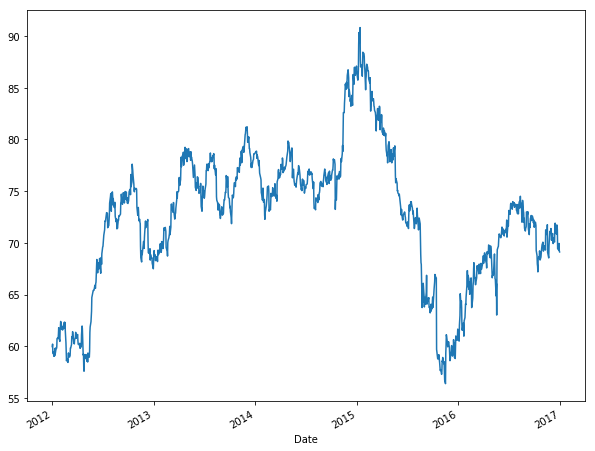

In [82]:
df['Open'].plot(figsize=(10, 8))

In [84]:
df['Open'].rolling(7).mean().head(20)

Date
2012-01-03          NaN
2012-01-04          NaN
2012-01-05          NaN
2012-01-06          NaN
2012-01-09          NaN
2012-01-10          NaN
2012-01-11    59.495714
2012-01-12    59.469999
2012-01-13    59.322857
2012-01-17    59.397143
2012-01-18    59.450000
2012-01-19    59.578572
2012-01-20    59.767143
2012-01-23    60.017143
2012-01-24    60.154286
2012-01-25    60.440000
2012-01-26    60.715714
2012-01-27    60.868572
2012-01-30    60.945715
2012-01-31    61.057143
Name: Open, dtype: float64

In [85]:
df.head()

,Open,High,Low,Close,Volume,Adj Close
Date,,,,,,
2012-01-03,59.970001,61.060001,59.869999,60.330002,12668800,52.619235
2012-01-04,60.209999,60.349998,59.470001,59.709999,9593300,52.078475
2012-01-05,59.349998,59.619999,58.369999,59.419998,12768200,51.825539
2012-01-06,59.419998,59.450001,58.869999,59.000000,8069400,51.459220
2012-01-09,59.029999,59.549999,58.919998,59.180000,6679300,51.616215


In [86]:
df.rolling(7).mean().head(20)

,Open,High,Low,Close,Volume,Adj Close
Date,,,,,,
2012-01-03,NaN,NaN,NaN,NaN,NaN,NaN
2012-01-04,NaN,NaN,NaN,NaN,NaN,NaN
2012-01-05,NaN,NaN,NaN,NaN,NaN,NaN
2012-01-06,NaN,NaN,NaN,NaN,NaN,NaN
2012-01-09,NaN,NaN,NaN,NaN,NaN,NaN
2012-01-10,NaN,NaN,NaN,NaN,NaN,NaN
2012-01-11,59.495714,59.895714,59.074285,59.440000,9.007414e+06,51.842984
2012-01-12,59.469999,59.744285,59.007143,59.321429,8.231357e+06,51.739567
2012-01-13,59.322857,59.638571,58.941428,59.297143,7.965071e+06,51.718386


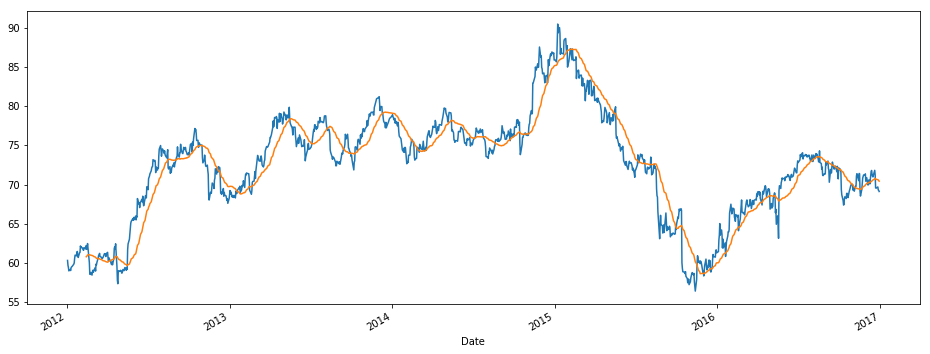

In [88]:
df['Close'].plot(figsize=(16, 6))
df.rolling(window=30).mean()['Close'].plot(figsize=(16,6))

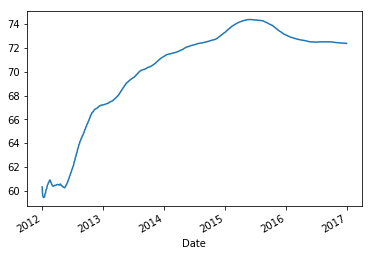

In [94]:
df['Close'].expanding(min_periods=1).mean().plot()

### 볼린저 밴드

In [96]:
df['Close Mean'] = df['Close'].rolling(window=20).mean()

In [98]:
df['Close Std'] = df['Close'].rolling(window=20).std()*2

In [99]:
df['Upper'] = df['Close Mean'] + df['Close Std']

In [100]:
df['Lower'] = df['Close Mean'] - df['Close Std']

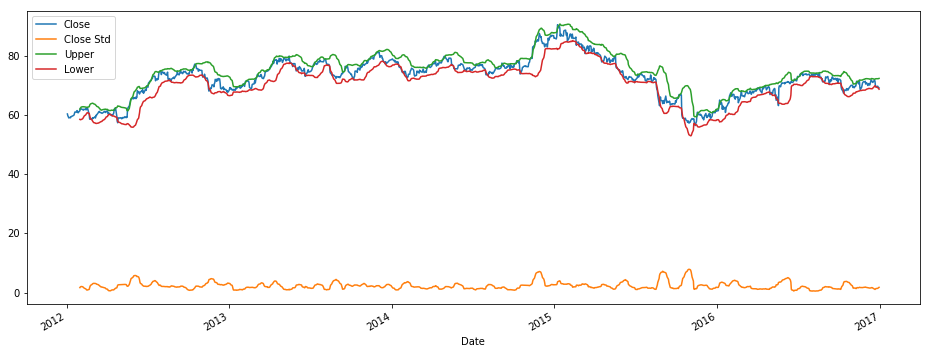

In [101]:
df[['Close', 'Close Std', 'Upper', 'Lower']].plot(figsize=(16, 6))

In [106]:
mc = pd.read_csv('./data/mcdonalds.csv', index_col='Date', parse_dates=True)

In [107]:
mc.head()

,Adj. Close,Adj. Volume
Date,,
1970-01-02,0.209761,2825604.0
1970-01-05,0.213316,2210449.5
1970-01-06,0.214501,1951168.5
1970-01-07,0.213316,2728768.5
1970-01-08,0.213316,2242404.0


In [108]:
mc.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 11993 entries, 1970-01-02 to 2017-07-14
Data columns (total 2 columns):
Adj. Close     11993 non-null float64
Adj. Volume    11993 non-null float64
dtypes: float64(2)
memory usage: 281.1 KB


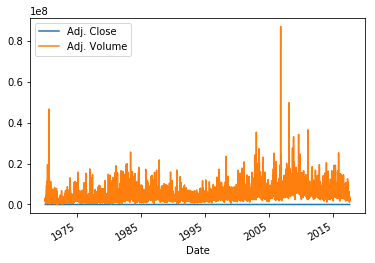

In [110]:
mc.plot()

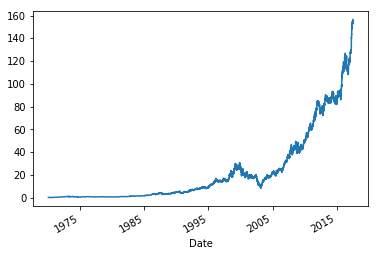

In [113]:
mc['Adj. Close'].plot()

Text(0.5,1,'Mcdonald')

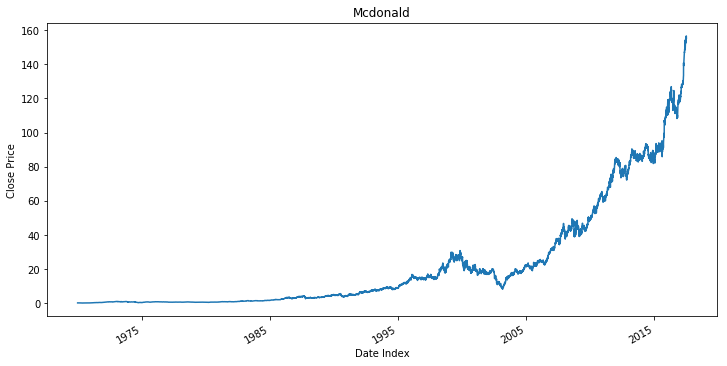

In [121]:
mc['Adj. Close'].plot(figsize=(12, 6))
plt.ylabel('Close Price');
plt.xlabel('Date Index')
plt.title('Mcdonald')

Text(0.5,0,'Date Index')

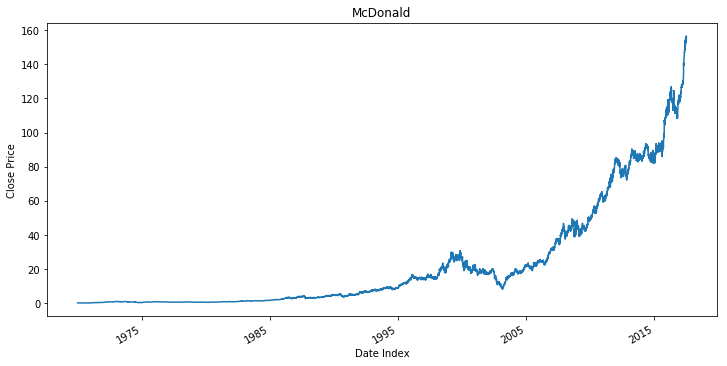

In [123]:
mc['Adj. Close'].plot(figsize=(12, 6), title='McDonald')
plt.ylabel('Close Price')
plt.xlabel('Date Index')

In [126]:
mc['2007-001-01':'2009-01-01'].head()

,Adj. Close,Adj. Volume
Date,,
2007-01-03,31.662754,7579100.0
2007-01-04,31.424580,9776100.0
2007-01-05,31.424580,5701000.0
2007-01-08,31.547276,4538500.0
2007-01-09,31.605015,6832800.0


In [127]:
mc['2007-001-01':'2009-01-01'].tail()

,Adj. Close,Adj. Volume
Date,,
2008-12-24,46.670831,2574800.0
2008-12-26,46.503279,2410100.0
2008-12-29,45.985391,5785900.0
2008-12-30,47.021166,5801000.0
2008-12-31,47.363886,6230500.0


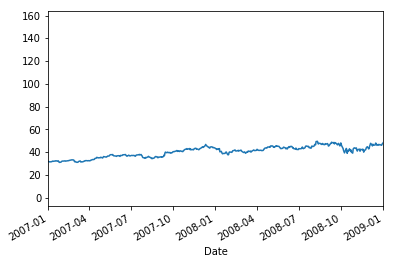

In [130]:
mc['Adj. Close'].plot(xlim=['2007-01-01', '2009-01-01'])

In [132]:
idx = mc['2007-01-01':'2009-01-01'].index

In [133]:
stock = mc['2007-01-01':'2009-01-01']['Adj. Close']

In [138]:
import matplotlib.dates as dates

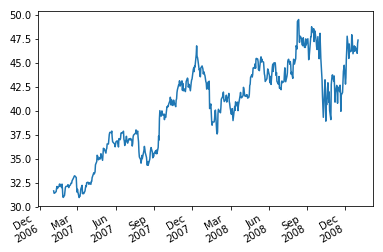

In [141]:
fig, ax = plt.subplots()
ax.plot_date(idx, stock, '-')
#ax.xaxis.set_major_locator(dates.MonthLocator())
ax.xaxis.set_major_formatter(dates.DateFormatter('%b\n%Y'))
fig.autofmt_xdate()  # <-- 겹치지 않게
plt.show()